In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [4]:
using Revise
includet("./newbase.jl")

In [5]:
using GLMakie
using CairoMakie

# Get the data

In [124]:
@time xx = do_DR_run(
    10 .^ range(2., -6, 15), 1e6,
    10., 1.,
    1., 1.,
    1e-6, 1.,
    100., 1e-5,
    5, 2000
)

Progress: 100%|█████████████████████████████████████████| Time: 0:07:16


436.547759 seconds (171.32 M allocations: 177.120 GiB, 1.50% gc time)


"v1_run_251125_151548.jld2"

# Look at it

In [254]:
f = jldopen("./v1_run1.jld2")

DRs = f["DRs"]
fss = f["sp_final_states"]
avgNs = f["sp_final_avgNs"]
ns_avgN = f["ns_final_avgN"]

Nstds = map(fss) do fs
    std(fs[1,:])
end;

L = f["L"]
sN = f["sN"]
dx = L / sN

nothing

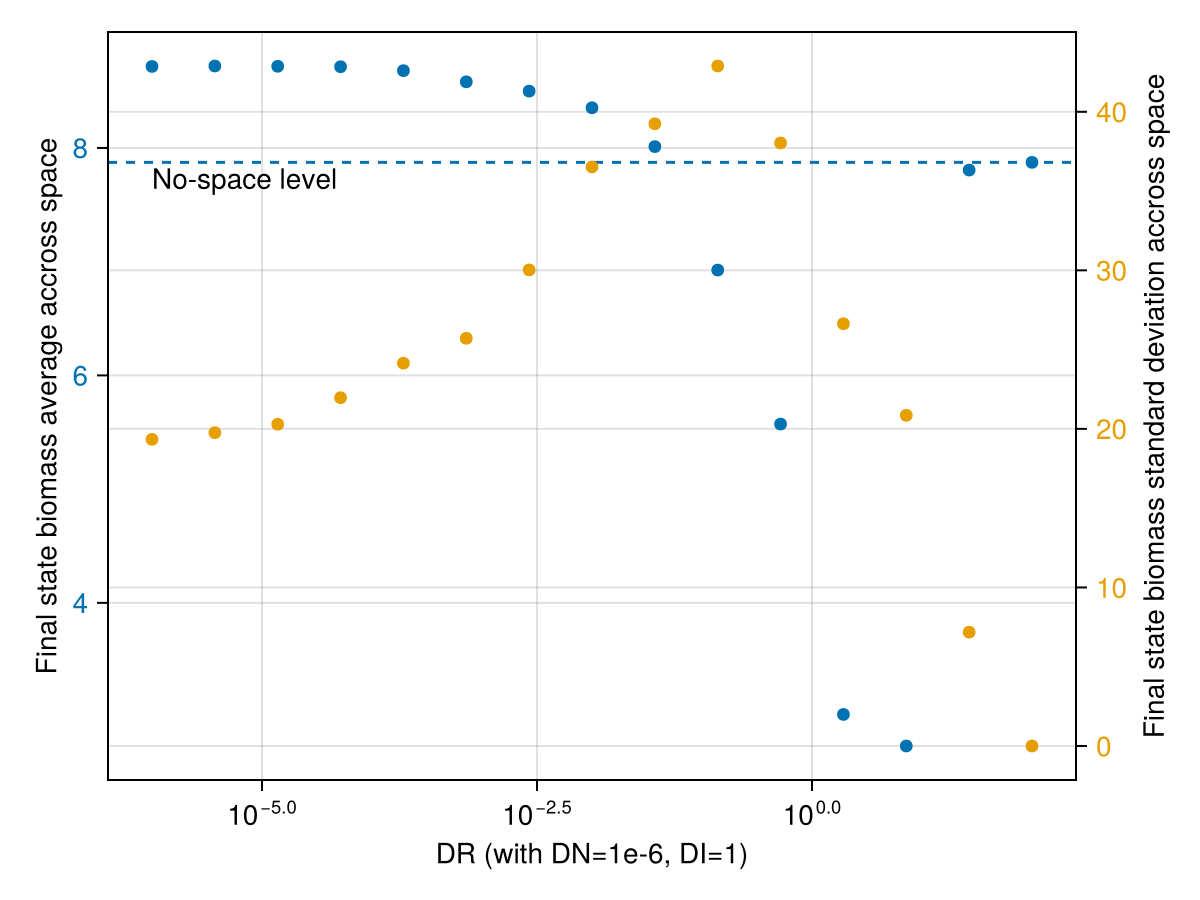

In [262]:
fig = Figure()
ax = Axis(fig[1,1];
    xscale=log10,
    ylabel="Final state biomass average accross space",
    xlabel="DR (with DN=1e-6, DI=1)",
    yticklabelcolor=Makie.wong_colors()[1],
)

# ax.xticks = 10. .^ (-5:0)

ax2 = Axis(fig[1,1];
    xscale=log10,
    yaxisposition=:right,
    yticklabelcolor=Makie.wong_colors()[2],
    ylabel="Final state biomass standard deviation accross space"
)
hidespines!(ax2)
hidexdecorations!(ax2)

scatter!(ax, DRs, avgNs)
# errorbars!(ax, DRs, avgNs, Nstds)
scatter!(ax2, DRs, Nstds; color=Cycled(2))

hlines!(ax, ns_avgN; linestyle=:dash)
text!(ax, minimum(DRs), ns_avgN;
    text="No-space level",
    align=(:left, :top)
)

Makie.save("./biom_vs_DR1.pdf", fig)

fig

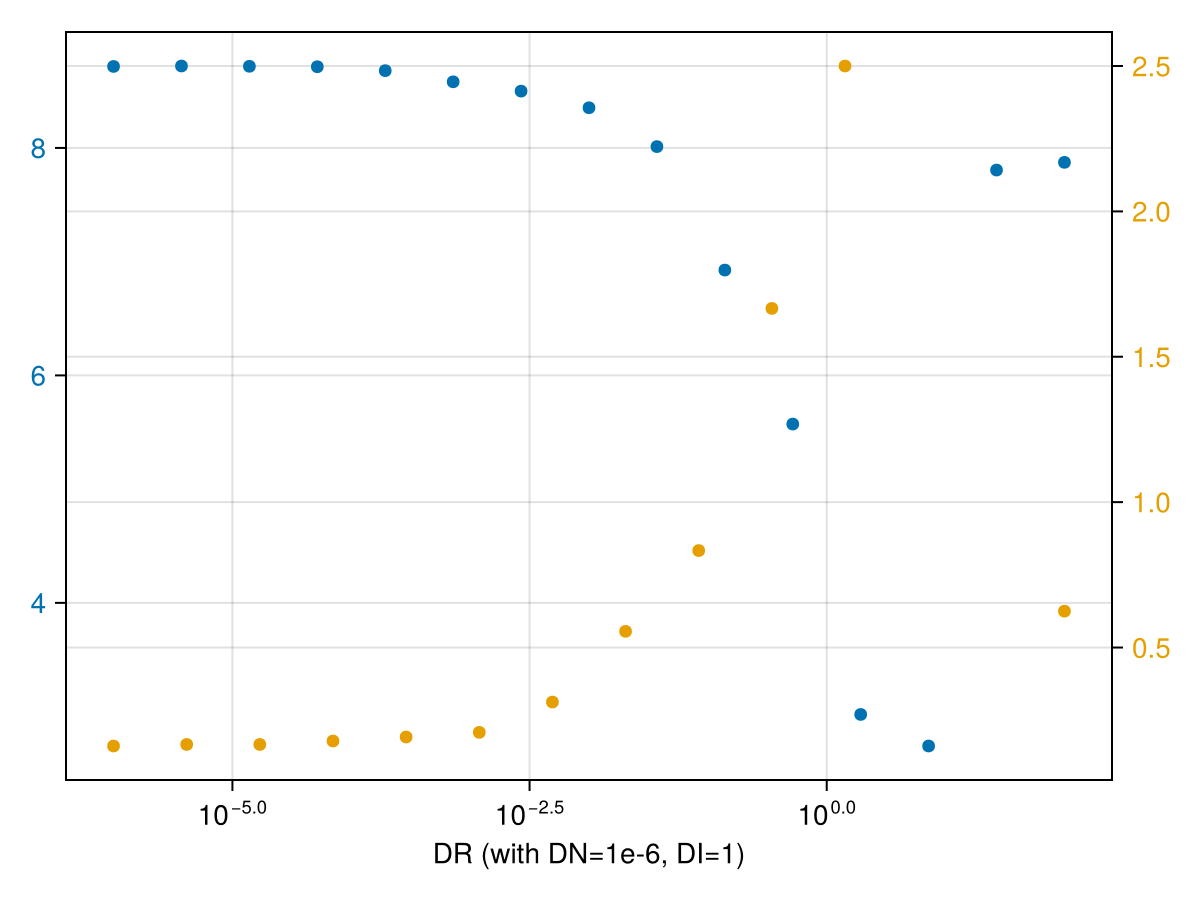

In [253]:
pks = get_peaks(fss, dx;
    # minprom=1.,
)

fig = Figure()
ax = Axis(fig[1,1];
    xscale=log10,
    # ylabel="Final state biomass average accross space",
    xlabel="DR (with DN=1e-6, DI=1)",
    yticklabelcolor=Makie.wong_colors()[1],
)

ax2 = Axis(fig[1,1];
    xscale=log10,
    yaxisposition=:right,
    yticklabelcolor=Makie.wong_colors()[2],
    # ylabel="Final state biomass standard deviation accross space"
)
hidespines!(ax2)
hidexdecorations!(ax2)

scatter!(ax, DRs, avgNs,
    color=Makie.wong_colors()[1],
)
scatter!(ax2, DRs, pks.avg_pksp,
    color=Makie.wong_colors()[2],
)

# hlines!(ax, ns_avgN; linestyle=:dash)
# text!(ax, minimum(DRs), ns_avgN;
#     text="No-space level",
#     align=(:left, :top)
# )

fig

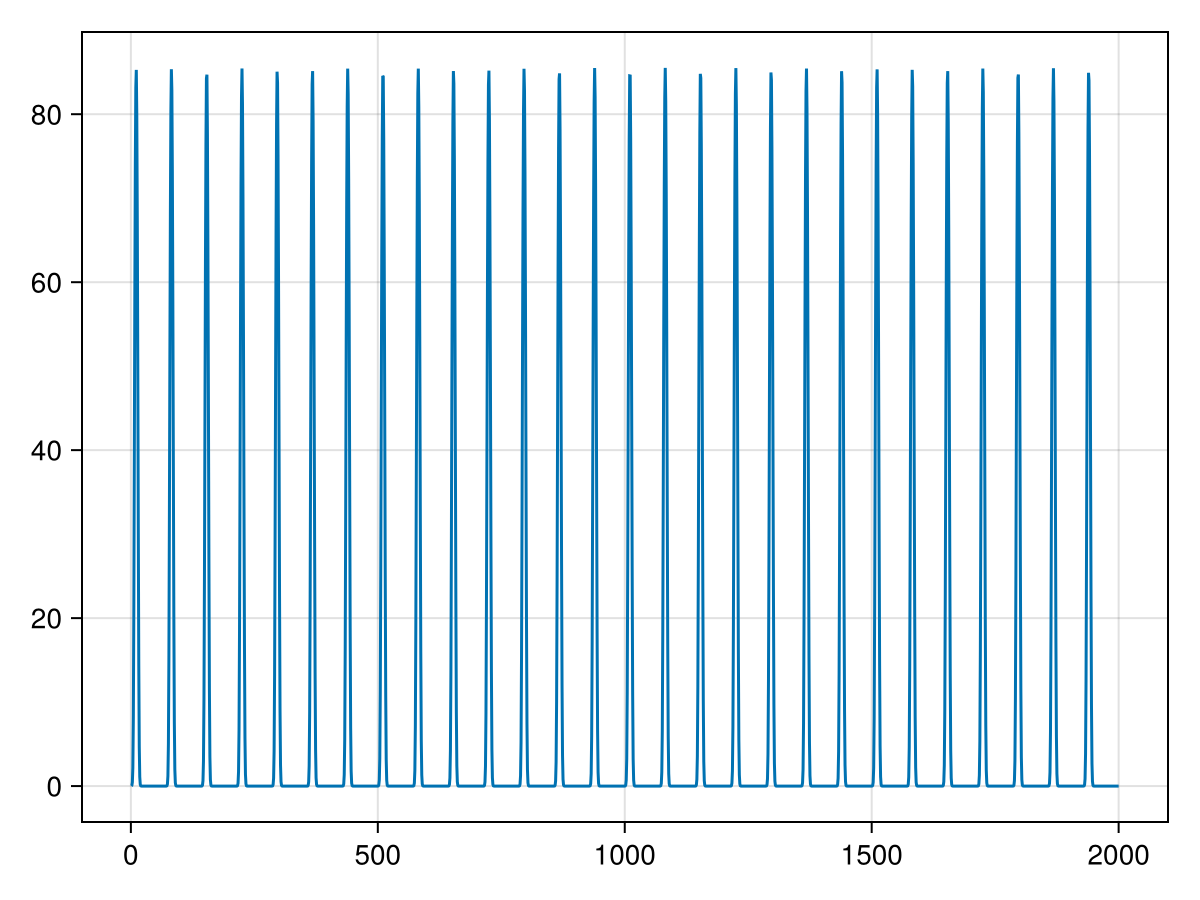

In [251]:
lines(f["sp_final_states"][end-3][1,:])